<a href="https://colab.research.google.com/github/harsh-s15/Speech-Emotion-DL/blob/main/visualise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **About Dataset**
Ryerson Audio-Visual Database of Emotional Speech and Song (RAVDESS)
Speech audio-only files (16bit, 48kHz .wav) from the RAVDESS.
---
Files

This portion of the RAVDESS contains 1440 files: 60 trials per actor x 24 actors = 1440. The RAVDESS contains 24 professional actors (12 female, 12 male), vocalizing two lexically-matched statements in a neutral North American accent. Speech emotions includes calm, happy, sad, angry, fearful, surprise, and disgust expressions. Each expression is produced at two levels of emotional intensity (normal, strong), with an additional neutral expression.

###**File naming convention**

Each of the 1440 files has a unique filename. The filename consists of a 7-part numerical identifier (e.g., 03-01-06-01-02-01-12.wav). These identifiers define the stimulus characteristics:

###**Filename identifiers**

Modality (01 = full-AV, 02 = video-only, 03 = audio-only).
Vocal channel (01 = speech, 02 = song).
Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).
Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.
Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").
Repetition (01 = 1st repetition, 02 = 2nd repetition).
Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).

Filename example: 03-01-06-01-02-01-12.wav

Audio-only (03)
Speech (01)
Fearful (06)
Normal intensity (01)
Statement "dogs" (02)
1st Repetition (01)
12th Actor (12)
Female, as the actor ID number is even.

In [ ]:
from IPython.lib.display import Audio

In [ ]:
import numpy as np 
# import sounddevice as sd
import matplotlib.pyplot as plt
import librosa
import librosa.display
import warnings
warnings.filterwarnings('ignore')

In [ ]:
root = r'/content/drive/MyDrive/ser_updated/speech-emotion-recognition-ravdess-data/'

In [ ]:
signal,sr = librosa.load(root + r'Actor_01/03-01-01-01-01-01-01.wav')

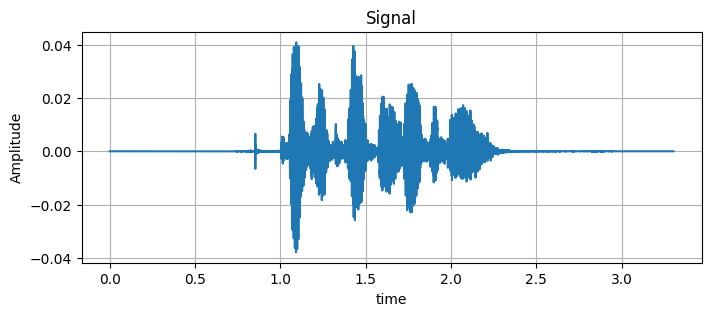

In [ ]:
plt.figure(figsize=(8,3))
plt.plot(np.arange(1,1+len(signal))/sr,signal)
plt.title('Signal')
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

In [ ]:
Audio(signal,rate=sr)

## **Pre-emphasis**

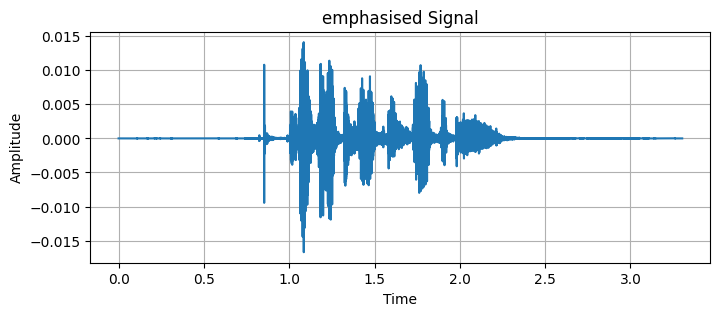

In [ ]:
emp_signal = np.append(signal[0],signal[1:]-0.97*signal[:-1])
plt.figure(figsize=(8,3))
plt.plot(np.arange(1,1+len(emp_signal))/sr,emp_signal)
plt.title('emphasised Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

In [ ]:
Audio(emp_signal, rate=sr, autoplay=False)

### **Visualising Mel Spectrogram for regular and emphasised signal**

In [ ]:
def showEmphasizedSpec(path):
    signal, sr = librosa.load(path)
    n_fft = 2048
    hop_length = 512

    plt.figure(figsize=(10,3.4))
    
    # Display spectrogram
    plt.subplot(1,2,1)
    spec = np.abs(librosa.stft(signal, n_fft=n_fft, hop_length=hop_length)) ** 2
    log_spec = librosa.amplitude_to_db(spec)
    # print(spec.shape)
    
    librosa.display.specshow(log_spec, sr=sr, hop_length=hop_length, 
                             x_axis='time', y_axis='mel',cmap='jet')
    plt.title('signal')
    plt.colorbar(format='%+2.0f dB')
    plt.tight_layout()

    emp_signal = np.append(signal[0],signal[1:]-0.98*signal[:-1])

    #display emphasized spectrogram
    plt.subplot(1,2,2)
    spec = np.abs(librosa.stft(emp_signal, n_fft=n_fft, hop_length=hop_length)) ** 2
    log_spec = librosa.amplitude_to_db(spec)

    librosa.display.specshow(log_spec, sr=sr, hop_length=hop_length, 
                             x_axis='time', y_axis='mel',cmap='jet')
    plt.title('emphasised signal')
    plt.colorbar(format='%+2.0f dB')
    plt.tight_layout()
    plt.show()   

    # Audio(emp_signal,rate=sr,autoplay=False)
    

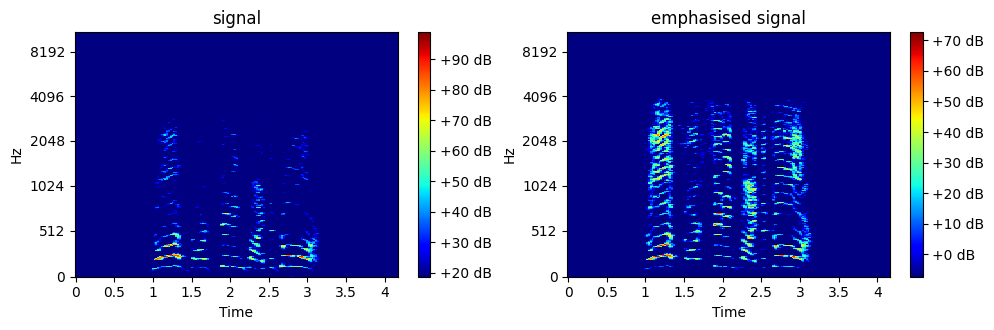

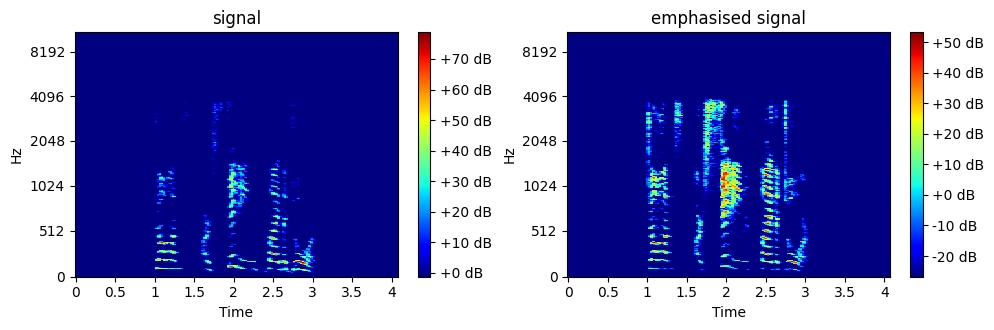

In [ ]:
# anger
showEmphasizedSpec(root + r'Actor_13/03-01-05-02-02-02-13.wav')
showEmphasizedSpec(root + r'Actor_16/03-01-05-02-02-02-16.wav')
# showEmphasizedSpec(root + r'Actor_15/03-01-05-02-02-02-15.wav')

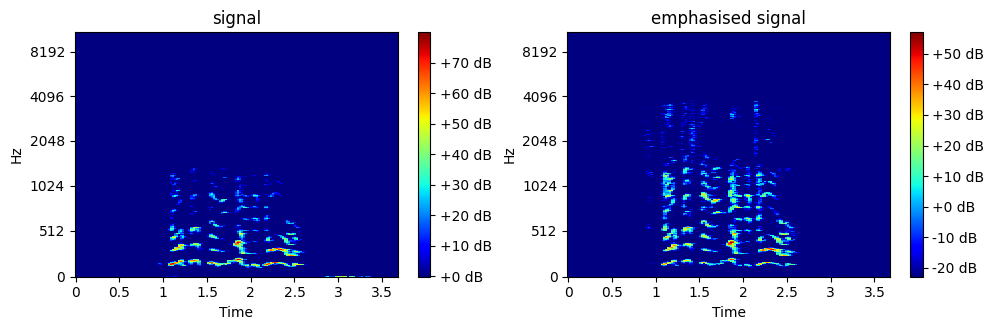

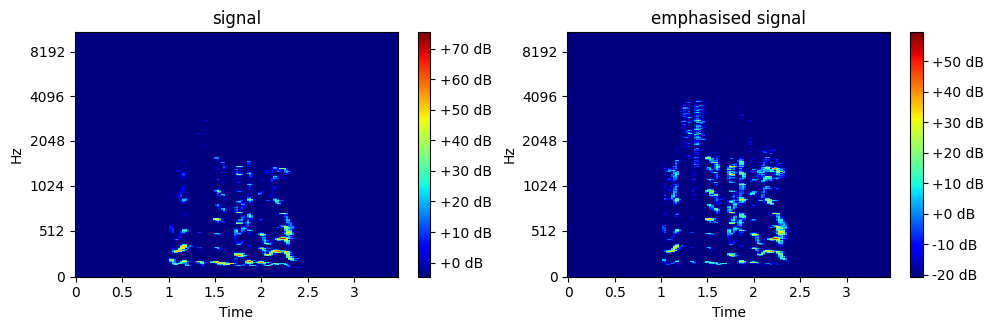

In [ ]:
# fearful
showEmphasizedSpec(root + 'Actor_12/03-01-06-02-02-02-12.wav')
showEmphasizedSpec(root + 'Actor_14/03-01-06-02-02-02-14.wav')
# showEmphasizedSpec(root + 'Actor_16/03-01-06-02-02-02-16.wav')

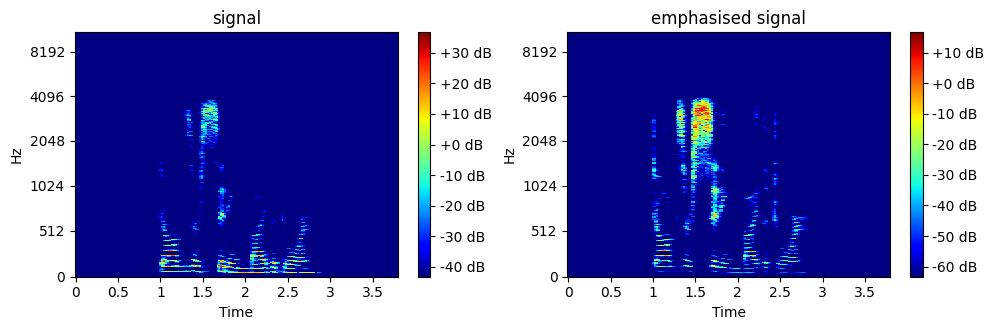

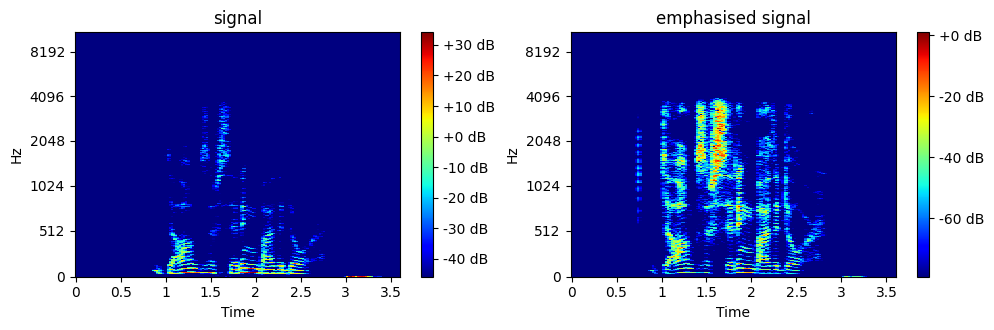

In [ ]:
# calm
showEmphasizedSpec(root + r'Actor_16/03-01-02-02-02-02-16.wav')
showEmphasizedSpec(root + r'Actor_15/03-01-02-02-02-02-15.wav')
# showEmphasizedSpec(root + r'Actor_22/03-01-02-02-02-02-22.wav')

### **MFCC variations and feature importance : distinguishability for raw and time averaged spectrograms**

In [ ]:
def showMFCC(path):
    signal, sr = librosa.load(path)
    emp_signal = signal#np.append(signal[0],signal[1:]-0.98*signal[:-1])

    n_fft = 4096
    hop_length = 512
    n_mfcc = 72
    plt.figure(figsize=(10,3.4))

    mfccs = librosa.feature.mfcc(y = emp_signal, sr=sr, n_mfcc=n_mfcc)# n_fft=n_fft, hop_length=hop_length, n_mfcc=n_mfcc)
    # print(mfccs)
    
    # Display MFCCs
    plt.subplot(1,2,1)
    librosa.display.specshow(mfccs, x_axis='time',y_axis='mel', cmap='jet')
    plt.colorbar()
    plt.title('MFCCs')
    plt.tight_layout()

    plt.subplot(1,2,2)
    plt.xlabel('# MFCC coefficient')
    # plt.ylabel('average intensity (dB)')
    plt.plot(mfccs.max(axis=1))
    plt.show()

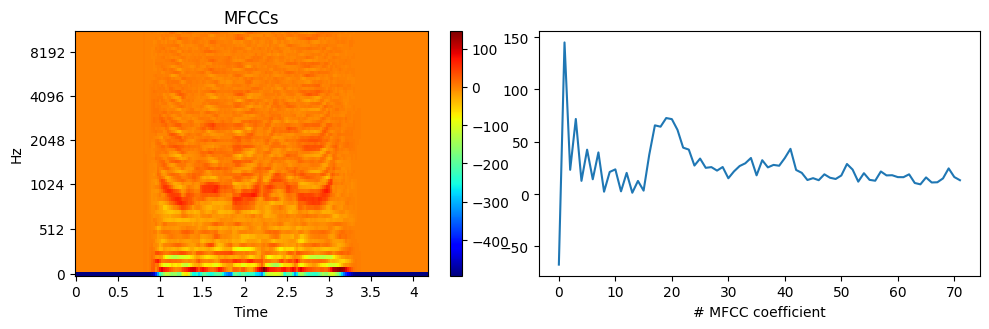

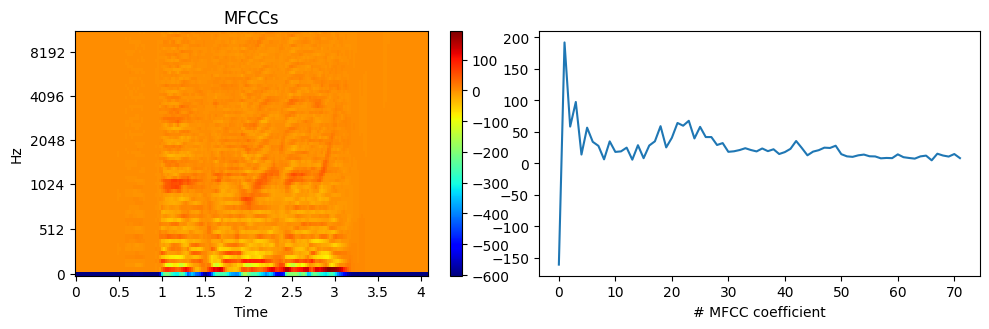

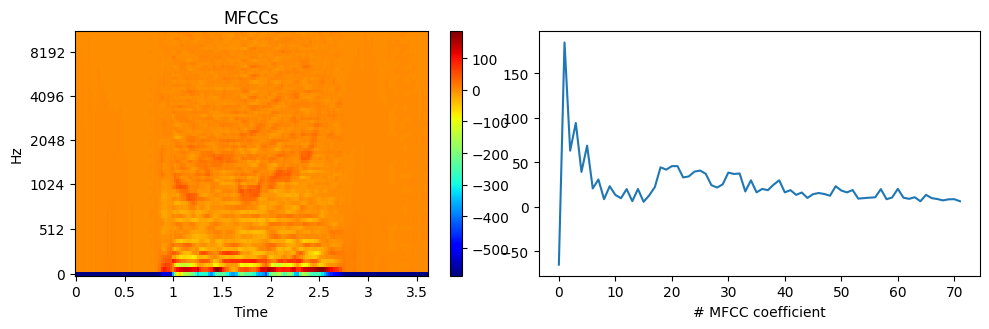

In [ ]:
# anger
showMFCC(root + r'Actor_13/03-01-05-02-02-02-13.wav')
showMFCC(root + r'Actor_16/03-01-05-02-02-02-16.wav')
showMFCC(root + r'Actor_15/03-01-05-02-02-02-15.wav')

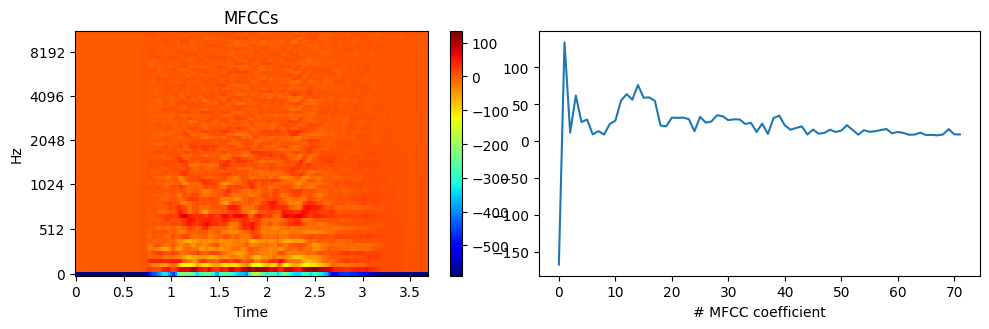

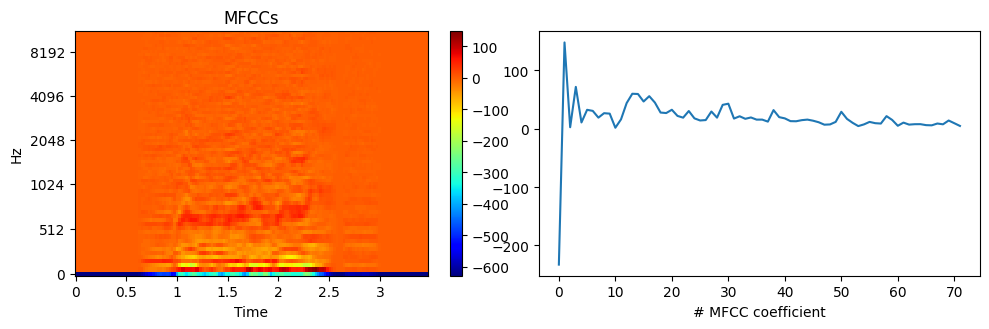

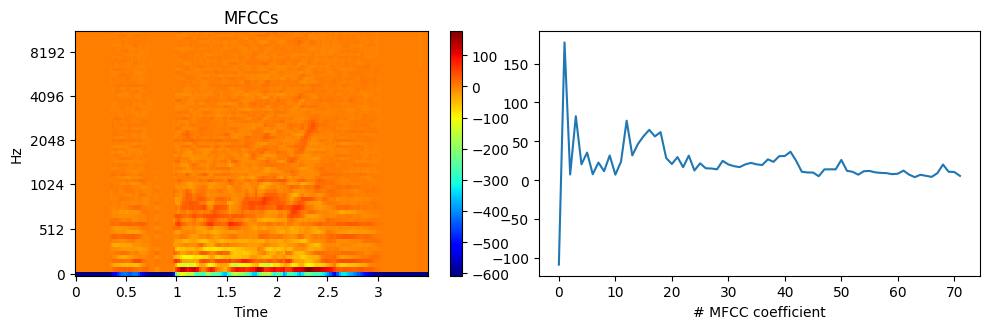

In [ ]:
# fearful
showMFCC(root + r'Actor_12/03-01-06-02-02-02-12.wav')
showMFCC(root + r'Actor_14/03-01-06-02-02-02-14.wav')
showMFCC(root + r'Actor_16/03-01-06-02-02-02-16.wav')

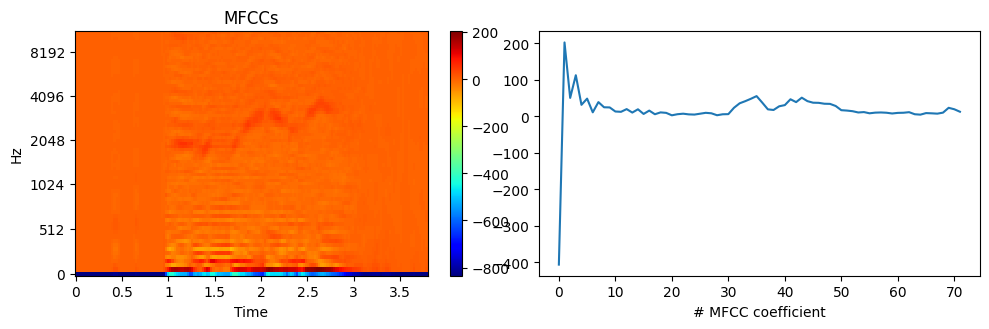

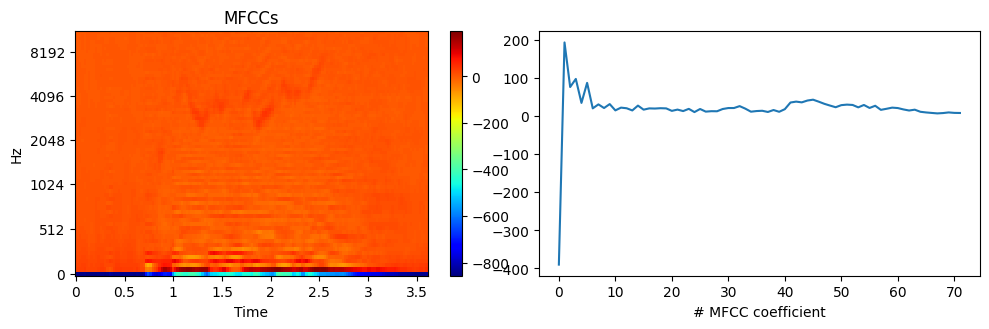

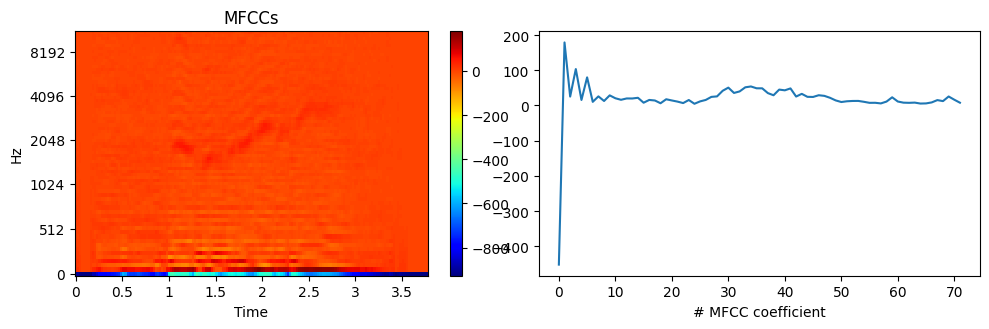

In [ ]:
# calm
showMFCC(root + r'Actor_16/03-01-02-02-02-02-16.wav')
showMFCC(root + r'Actor_15/03-01-02-02-02-02-15.wav')
showMFCC(root + r'Actor_22/03-01-02-02-02-02-22.wav')

## **Chromagram - to reduce time correlation and bring out pitch variations.**

In [ ]:
def showChroma(path):
    signal, sr = librosa.load(path)
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    chroma = librosa.feature.chroma_cqt(y=signal, sr=sr, n_chroma=36)
    librosa.display.specshow(chroma,x_axis='time',y_axis='mel')
    plt.colorbar()

    # plt.subplot(1,2,2)
    # plt.plot(chroma.mean(axis=1))
    # plt.xlabel()

    plt.show()

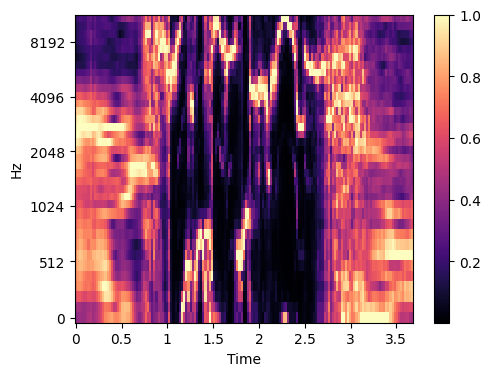

In [ ]:
path = root + r'Actor_12/03-01-06-02-02-02-12.wav'
showChroma(path)

## **Spectral Contrast**

---
mean across the time axis does not give high distinguishability for chroma and spectral contrast.

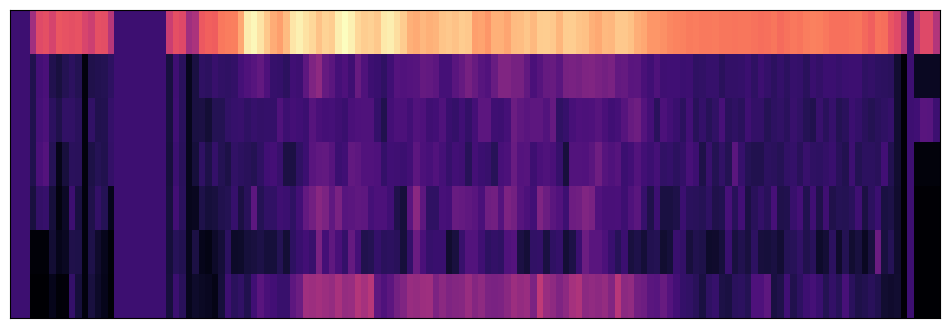

In [ ]:
spectral_contrast = librosa.feature.spectral_contrast(y=signal,sr=sr)
plt.figure(figsize=(12,4))
librosa.display.specshow(spectral_contrast)

## **We extract the following time averaged prasodic features for analysis.**

In [ ]:
def extractFeature(file_name, mfcc=True, chroma=True, mel=True):
    X,sample_rate = librosa.load(file_name)
    stft=np.abs(librosa.stft(X))
    result=np.array([])
    mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
    result=np.hstack((result, mfccs))
    chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
    result=np.hstack((result, chroma))
    mel=np.mean(librosa.feature.melspectrogram(y=X, sr=sample_rate).T,axis=0)
    result=np.hstack((result, mel))
    return result

In [ ]:
extractFeature(path).shape

(180,)

## **`No. of features extracted for timed averaged analysis = 180`**

Next : [exploratory modeling](https://colab.research.google.com/drive/13wRthy19CPXnhFHKeDsyMcy3XNA8PEWL?usp=share_link)